# Capstone Project

## Park Slope Parents Membership
#### Part 2c: Time Series

In [1]:
# Load libraries

from datetime import datetime, date, timedelta
import csv
import pandas as pd 
import plotly.graph_objs as go
import plotly.plotly as py
py.sign_in('ajbentley', 'zjfu2vasav')

import matplotlib.pyplot as plt
%matplotlib inline
import pep8


In [2]:
# read in data

dfn = pd.read_csv("../../projects/psp/refined_data/psp_numerical.csv")
dfn.info()
# dfn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14591 entries, 0 to 14590
Data columns (total 66 columns):
mem_no                                                                            14591 non-null object
city                                                                              14591 non-null object
state                                                                             14591 non-null object
zip                                                                               14591 non-null int64
joined                                                                            14591 non-null object
exp_date                                                                          14591 non-null object
status                                                                            14591 non-null object
mem_type                                                                          14591 non-null int64
last_renewal_date                                            

/Users/EKandTower/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14591 entries, 0 to 14590
Data columns (total 66 columns):
mem_no                                                                            14591 non-null object
city                                                                              14591 non-null object
state                                                                             14591 non-null object
zip                                                                               14591 non-null int64
joined                                                                            14591 non-null object
exp_date                                                                          14591 non-null object
status                                                                            14591 non-null object
mem_type                                                                          14591 non-null int64
last_renewal_date                                            

In [4]:
dfn.T.tail(20)

,0,1,2,3,4,5,6,7,8,9,...,14581,14582,14583,14584,14585,14586,14587,14588,14589,14590
tony_dids_No,0,1,1,0,1,0,1,0,0,0,...,1,0,1,0,0,1,1,1,1,1
tony_dids_Yes,1,0,0,1,0,1,0,1,1,1,...,0,1,0,1,1,0,0,0,0,0
discovered_A PSP member I don't know told me about it,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
discovered_A PSP member who is a friend/neighbor,0,0,1,1,1,0,1,1,0,1,...,0,1,1,1,0,1,1,0,1,1
discovered_Found it through Yahoo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
discovered_Found it through a Google search,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
"discovered_Heard about it on another online parenting group (Urban Baby, etc.)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"discovered_Heard about it through a magazine, newspaper, blog",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
discovered_I don't remember,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
discovered_Other,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I discovered that in 2007 PSP got a website and in 2009 began charging for membership. After exploring year to year data I concluded that these changes were disruptive / significant and chose to cut data prior to 2010.

In order to cut those dates without losing members who joined prior to 2010 I'll first dummy out columns representing membership in each year and will then drop rows that don't indicate membership in 2010 or sooner.

In [5]:
dfn.exp_year.max()

2040

In [6]:
# expyear = pd.Series(dfn.exp_year)
# expyear.drop(([2014, 2012, 2013, 2010, 2011, 2015, 2009]), inplace=True)
# expyear = int([2020, 2017, 2019, 2018, 2016, 2029, 2030, 2040, 2039, 2021, 2034, 2025])
# expyear.unique()


In [7]:
# isolate members by year

annual_mem_cols = ['mem_no','joined', 'exp_date', 'exp_year']
dfy = pd.DataFrame(dfn[annual_mem_cols])

dfy['joined'] = pd.to_datetime(dfy['joined'])
dfy['exp_date'] = pd.to_datetime(dfy['exp_date'])

year_list = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

for year in year_list:
    
    dfy['mem_' + str(year)] = dfy.apply(lambda x: x['joined'].year <= year and x['exp_date'].\
                                        year>= year, axis=1).astype('int')

In [8]:
memlist_2016 = []

for n in dfn.exp_year:
    if n >= 2016:
        memlist_2016.append(1)
    else:
        memlist_2016.append(0)

        
m16 = pd.Series(memlist_2016)
        
dfy = pd.concat([dfy, m16], axis = 1)
dfy.rename (columns={0:'mem_2016'}, inplace=True)
dfy.head()

,mem_no,joined,exp_date,exp_year,mem_2002,mem_2003,mem_2004,mem_2005,mem_2006,mem_2007,mem_2008,mem_2009,mem_2010,mem_2011,mem_2012,mem_2013,mem_2014,mem_2015,mem_2016
0,00004,2009-04-13,2020-04-12,2020,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
1,00101,2002-07-17,2014-09-15,2014,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
2,00118,2002-08-13,2017-06-15,2017,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,00121,2002-08-26,2019-06-16,2019,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,00122,2002-08-28,2017-06-20,2017,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [9]:
### Prior attempt
        
# ml16 = pd.Series(memlist_2016)

# def ml16(x,y):
#     for n in x:
#         if n <= 2016:
#             for n in y:
#                 if n>= 2016:
#                     memlist_2016.append(1)
#         else:
#             memlist_2016.append(0)  


# ml16(dfn['join_year'], dfn['exp_year'])            
            
# for row in dfy:
#     if 'join_year' <= 2016 | 'exp_year' >= 2016:
#         memlist_2016.append(1)
#     else:
#         memlist_2016.append(0)



# smem_2016 = pd.Series(memlist_2016)

# dfy['mem_2016'] = smem_2016

# dfy['mem_2016'] = dfy.apply(lambda x: x['exp_date'] <= 2016, axis=1).astype('int')

# dfy.head()

##### previous attempt, which stopped indicating membership after it found a first year

# for year in year_list:

#     mem_year_list = []
    
#     for x in dfy.join_year:
#         while x == year:
#             if x >= year | x < (year+1):
#                 mem_year_list.append(1)
#             else:
#                 mem_year_list.append(0)

#     myl = pd.Series(mem_year_list)
#     dfy[year] = myl
#     er = str(year)
#     er = ('mem_'+ er[2:])
#     dfy.rename (columns={year:er}, inplace=True)

In [10]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14591 entries, 0 to 14590
Data columns (total 19 columns):
mem_no      14591 non-null object
joined      14591 non-null datetime64[ns]
exp_date    14591 non-null datetime64[ns]
exp_year    14591 non-null int64
mem_2002    14591 non-null int64
mem_2003    14591 non-null int64
mem_2004    14591 non-null int64
mem_2005    14591 non-null int64
mem_2006    14591 non-null int64
mem_2007    14591 non-null int64
mem_2008    14591 non-null int64
mem_2009    14591 non-null int64
mem_2010    14591 non-null int64
mem_2011    14591 non-null int64
mem_2012    14591 non-null int64
mem_2013    14591 non-null int64
mem_2014    14591 non-null int64
mem_2015    14591 non-null int64
mem_2016    14591 non-null int64
dtypes: datetime64[ns](2), int64(16), object(1)
memory usage: 2.1+ MB


In [11]:
# annual_mem_cols = ['mem_no','joined', 'exp_date']
# dfy = pd.DataFrame(dfn[annual_mem_cols])

# dfy['joined'] = pd.to_datetime(dfy['joined'])
# dfy['exp_date'] = pd.to_datetime(dfy['exp_date'])

# df1=pd.concat([pd.Series(r.Index, 
#                          pd.date_range(r.joined,r.exp_date+pd.offsets.YearEnd(1), freq='A')) 
#                for r in dfy.itertuples()]).reset_index()
# df1.columns=[ 'years', 'index']
# df1.years = df1.years.dt.year
# df1['vals'] = 1
# df1 = df1.pivot(index='index', columns='years', values='vals').fillna(0).astype(int)
# print (df1)

# dfy.info()

In [12]:
# cut dfy down so there won't be repeated columns when concat with dfn

dfy.drop(['mem_no','joined', 'exp_date', 'exp_year'], axis=1, inplace=True)


dfn = pd.concat([dfn, dfy], axis = 1)


dfn.head()

,mem_no,city,state,zip,joined,exp_date,status,mem_type,last_renewal_date,gender,...,mem_2007,mem_2008,mem_2009,mem_2010,mem_2011,mem_2012,mem_2013,mem_2014,mem_2015,mem_2016
0,00004,brooklyn,NY,11215,2009-04-13,2020-04-12,Active,5,2009-04-13,Female,...,0,0,1,1,1,1,1,1,1,1
1,00101,brooklyn,NY,11215,2002-07-17,2014-09-15,Expired,0,2002-07-17,Female,...,1,1,1,1,1,1,1,1,0,0
2,00118,brooklyn,NY,11215,2002-08-13,2017-06-15,Active,0,2002-08-13,Female,...,1,1,1,1,1,1,1,1,1,1
3,00121,brooklyn,NY,11215,2002-08-26,2019-06-16,Active,2,2002-08-26,Female,...,1,1,1,1,1,1,1,1,1,1
4,00122,brooklyn,NY,11215,2002-08-28,2017-06-20,Active,0,2002-08-28,Female,...,1,1,1,1,1,1,1,1,1,1


### Overall membership trend

2010    4333
2011    5706
2012    6379
2013    6860
2014    7303
2015    7603
2016    6660
dtype: int64


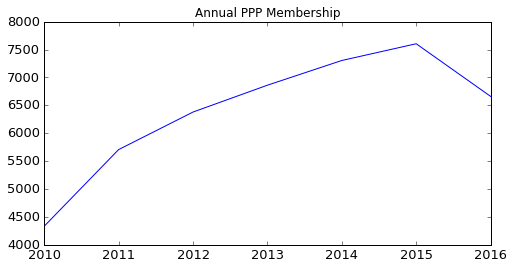

In [13]:
# first look just at overall membership changes year to year

mem_by_year_list = ['mem_2010','mem_2011','mem_2012','mem_2013','mem_2014','mem_2015','mem_2016']

dfmc = pd.DataFrame(dfn[mem_by_year_list])
dfmc.columns = ['2010', '2011', '2012', '2013', '2014', '2015', '2016']
memcount =[]
memcount = pd.Series(dfmc.sum(axis=0))
print memcount

memcount.plot(kind='line', figsize=(8,4), title="Annual PPP Membership", fontsize=13)


### Join by Month x Year

In [14]:
# create pivot table for join month and year
dfn_p = pd.pivot_table(dfn, values='mem_no', index='join_year', columns='join_month',\
               aggfunc=len, fill_value=0)

# dfn_p['annual'] = dfn_p.sum(axis=1)

# dfn_p

# dfn_pp = pd.DataFrame(dfn_p)
# dfn_pp.div(dfn_pp.iloc[13])



### could not figure out how to do stacked 100% graph in pandas, did in excel

In [15]:
dfn_p.to_csv("../../projects/psp/refined_data/join_pivot.csv",\
             index=True)

### Number of children trend

In [16]:
num_child_cols = ['mem_no','kid_count', 'mem_2010','mem_2011','mem_2012','mem_2013',\
                  'mem_2014','mem_2015','mem_2016']

dfn_num_child = pd.DataFrame(dfn[num_child_cols])

# count of members with child due by year
df_due = pd.DataFrame(dfn_num_child.loc[dfn_num_child['kid_count'] == 0.5])
due_count = df_due.sum(axis=0)
due = pd.Series(due_count)
print due_count

# # count of members with 1 child per year
df_one = pd.DataFrame(dfn_num_child.loc[dfn_num_child['kid_count'] == 1.0])
one_count = df_one.sum(axis=0)
one = pd.Series(one_count)
print one_count

# # count of members with 2 children by year
df_two = pd.DataFrame(dfn_num_child.loc[dfn_num_child['kid_count'] == 2.0])
two_count = df_two.sum(axis=0)
two = pd.Series(two_count)
print two_count

# # count of members with 3 children by year
df_three = pd.DataFrame(dfn_num_child.loc[dfn_num_child['kid_count'] == 3.0])
three_count = df_three.sum(axis=0)
three = pd.Series(three_count)
print three_count

# # count of members with 4 children by year
df_four = pd.DataFrame(dfn_num_child.loc[dfn_num_child['kid_count'] == 4.0])
kfour_count = df_four.sum(axis=0)
four_or_more = pd.Series(kfour_count)
print kfour_count

kid_count    938.5
mem_2010     241.0
mem_2011     360.0
mem_2012     397.0
mem_2013     420.0
mem_2014     508.0
mem_2015     723.0
mem_2016     881.0
dtype: float64
kid_count    6993.0
mem_2010     1688.0
mem_2011     2329.0
mem_2012     2696.0
mem_2013     3021.0
mem_2014     3425.0
mem_2015     3711.0
mem_2016     3196.0
dtype: float64
kid_count    9514.0
mem_2010     1990.0
mem_2011     2536.0
mem_2012     2787.0
mem_2013     2909.0
mem_2014     2849.0
mem_2015     2684.0
mem_2016     2194.0
dtype: float64
kid_count    2061.0
mem_2010      296.0
mem_2011      366.0
mem_2012      389.0
mem_2013      410.0
mem_2014      413.0
mem_2015      384.0
mem_2016      312.0
dtype: float64
kid_count    324.0
mem_2010      32.0
mem_2011      37.0
mem_2012      40.0
mem_2013      46.0
mem_2014      46.0
mem_2015      44.0
mem_2016      41.0
dtype: float64


In [17]:
df_kids = pd.concat([due, one, two, three, four_or_more], axis=1)
df_kids.drop(['kid_count'], axis=0, inplace=True)

In [18]:
df_kids.columns=('child_due','1 child','2 children','3 children','4 + children')
df_kids.describe()

,child_due,1 child,2 children,3 children,4 + children
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,504.285714,2866.571429,2564.142857,367.142857,40.857143
std,223.052844,690.939181,349.174946,46.196784,5.113009
min,241.000000,1688.000000,1990.000000,296.000000,32.000000
25%,378.500000,2512.500000,2365.000000,339.000000,38.500000
50%,420.000000,3021.000000,2684.000000,384.000000,41.000000
75%,615.500000,3310.500000,2818.000000,399.500000,45.000000
max,881.000000,3711.000000,2909.000000,413.000000,46.000000


In [19]:
### exporting to excel to make 100% stacked chart

# df_kids.to_csv("../../projects/psp/refined_data/kid_count_pivot.csv",\
#              index=True)

### Join v birth trend

In [20]:
-

SyntaxError: invalid syntax (<ipython-input-20-0a1f21a34173>, line 1)

In [ ]:
df_one.head()

In [ ]:
df_jvb = pd.concat([df_due, df_one, df_two, df_five, df_older], axis=0)
# df_kids.drop(['kid_count'], axis=0, inplace=True)
df_jvb.head(20)

In [ ]:
dfn_jvbpiv = pd.pivot_table(df_jvb, values='mem_no', index='join_year', columns='jvb_range',\
               aggfunc=len, fill_value=0)

In [21]:
### exporting to excel to make 100% stacked chart

dfn_jvbpiv.to_csv("../../projects/psp/refined_data/jvb_pivot.csv",\
             index=True)

NameError: name 'dfn_jvbpiv' is not defined

### Exp v birth trend

In [22]:
# create graph showing difference between when a memberbership lapsed and the age of youngest child (of 2) by year

exp_v_birth_cols = ['mem_no','exp_year','exp_v_birth']

dfn_exp_v_birth = pd.DataFrame(dfn[exp_v_birth_cols])

dfn_exp_v_birth.describe()

# calculate months from datetime (mult by 43200)
# 1 year = 518400
# 2 years = 1036800
# 3 years = 1555200
# 5 years = 2592000


# exped while child was under 1 year old
df_one_exp = pd.DataFrame(dfn_exp_v_birth.loc[dfn_exp_v_birth['exp_v_birth'] <= 51840.0])
df_one_exp['exp_range'] = 'exped while child under 1'


# exped while child was 1 - 2 years old
df_two_exp = pd.DataFrame(dfn_exp_v_birth.loc[dfn_exp_v_birth['exp_v_birth'] > 518400])
df_two_exp = pd.DataFrame(df_two_exp.loc[df_two_exp['exp_v_birth'] <= 1036800.0 ])
df_two_exp['exp_range'] = 'exped while child 1-2'


# exped while child was 2 - 3 years old
df_three_exp = pd.DataFrame(dfn_exp_v_birth.loc[dfn_exp_v_birth['exp_v_birth'] > 1036800.0])
df_three_exp = pd.DataFrame(df_three_exp.loc[df_three_exp['exp_v_birth'] <= 1555200.0 ])
df_three_exp['exp_range'] = 'exped while child 2-3'


# exped while child was 3 - 5 years old
df_five_exp = pd.DataFrame(dfn_exp_v_birth.loc[dfn_exp_v_birth['exp_v_birth'] > 1555200.0])
df_five_exp = pd.DataFrame(df_five_exp.loc[df_five_exp['exp_v_birth'] <= 2592000.0 ])
df_five_exp['exp_range'] = 'exped while child 3-5'


# exped while child was 5+ years old
df_older_exp = pd.DataFrame(dfn_exp_v_birth.loc[dfn_exp_v_birth['exp_v_birth'] > 2592000])
df_older_exp['exp_range'] = 'exped while child 5 or older'


In [23]:
df_evb = pd.concat([df_one_exp, df_two_exp, df_five_exp, df_older_exp], axis=0)
df_evb.head(20)

,mem_no,exp_year,exp_v_birth,exp_range
755,10065,2010,-21600.0,exped while child under 1
1531,15562,2010,-277920.0,exped while child under 1
1543,15581,2010,-1188000.0,exped while child under 1
2474,17026,2010,-1499040.0,exped while child under 1
3006,17733,2010,-79200.0,exped while child under 1
3258,18056,2013,5760.0,exped while child under 1
3272,18072,2011,-110880.0,exped while child under 1
3432,18278,2011,-201600.0,exped while child under 1
3532,18416,2011,-915840.0,exped while child under 1
3728,18682,2011,-120960.0,exped while child under 1


In [24]:
dfn_evbpiv = pd.pivot_table(df_evb, values='mem_no', index='exp_year', columns='exp_range',\
               aggfunc=len, fill_value=0)

In [25]:
### exporting to excel to make 100% stacked chart

dfn_evbpiv.to_csv("../../projects/psp/refined_data/evb_pivot.csv",\
             index=True)

### Google discovery Trend
I saw that word of mouth from friends/neighbors was overwhelmingly the top way to find out about PSP but Google Search was the #2 (known) means so I'll make a trend for this to see if there are any specific peaks. If there are then maybe there were triggers.

In [26]:
-

SyntaxError: invalid syntax (<ipython-input-26-0a1f21a34173>, line 1)

In [ ]:
### export to csv for graphing
dfn_p.to_csv("../../projects/psp/refined_data/google.csv",\
             index=True)

### Membership Type Trend

In [27]:
print dfn.mem_type

0        5
1        0
2        0
3        2
4        0
5        1
6        0
7        4
8        0
9        0
10       0
11       1
12       0
13       0
14       0
15       5
16       0
17       0
18       0
19       5
20       0
21       0
22       0
23       5
24       2
25       0
26       0
27       0
28       0
29       0
        ..
14561    0
14562    0
14563    0
14564    0
14565    0
14566    0
14567    0
14568    0
14569    0
14570    0
14571    0
14572    0
14573    0
14574    0
14575    0
14576    0
14577    0
14578    0
14579    0
14580    0
14581    0
14582    0
14583    0
14584    0
14585    0
14586    0
14587    0
14588    0
14589    0
14590    0
Name: mem_type, dtype: int64


In [28]:
mem_type_cols = ['mem_no','mem_type', 'mem_2010','mem_2011','mem_2012','mem_2013',\
                  'mem_2014','mem_2015','mem_2016']

dfn_mem_type = pd.DataFrame(dfn[mem_type_cols])

# count of members with 1 year membership
df_mem1 = pd.DataFrame(dfn_mem_type.loc[dfn_mem_type['mem_type'] == 0])
mem1_count = df_mem1.sum(axis=0)
smem1 = pd.Series(mem1_count)
print mem1_count

# # count of members with 2 year membership
df_mem2 = pd.DataFrame(dfn_mem_type.loc[dfn_mem_type['mem_type'] == 1])
mem2_count = df_mem2.sum(axis=0)
smem2 = pd.Series(mem2_count)
# print due_count

# # count of members with 3 year membership
df_mem3 = pd.DataFrame(dfn_mem_type.loc[dfn_mem_type['mem_type'] == 2])
mem3_count = df_mem3.sum(axis=0)
smem3 = pd.Series(mem3_count)
# print due_count

# # count of members with 5 year membership
df_mem5 = pd.DataFrame(dfn_mem_type.loc[dfn_mem_type['mem_type'] == 3])
mem5_count = df_mem5.sum(axis=0)
smem5 = pd.Series(mem5_count)
# print due_count

# # count of members with lifetime membership
df_memlife = pd.DataFrame(dfn_mem_type.loc[dfn_mem_type['mem_type'] == 5])
memlife_count = df_memlife.sum(axis=0)
smemlife = pd.Series(memlife_count)
# print due_count


mem_type       0
mem_2010    3866
mem_2011    5076
mem_2012    5540
mem_2013    5777
mem_2014    6013
mem_2015    6129
mem_2016    5201
dtype: int64


In [29]:
df_memt = pd.concat([smem1, smem2, smem3, smem5, smemlife], axis=1)
df_memt.drop(['mem_no','mem_type'], axis=0, inplace=True)

In [30]:
df_memt

,0,1,2,3,4
mem_2010,3866.0,318.0,79.0,36.0,23.0
mem_2011,5076.0,446.0,107.0,49.0,23.0
mem_2012,5540.0,596.0,154.0,61.0,23.0
mem_2013,5777.0,786.0,194.0,75.0,23.0
mem_2014,6013.0,947.0,231.0,83.0,23.0
mem_2015,6129.0,1085.0,269.0,92.0,23.0
mem_2016,5201.0,1060.0,277.0,95.0,23.0


In [31]:
df_memt.columns=('1yr_mem', '2yr_mem', '3yr_mem','5yr_mem','lifetime')
df_memt.describe()

,1yr_mem,2yr_mem,3yr_mem,5yr_mem,lifetime
count,7.000000,7.000000,7.000000,7.000000,7.0
mean,5371.714286,748.285714,187.285714,70.142857,23.0
std,770.397238,303.085639,77.418160,22.289224,0.0
min,3866.000000,318.000000,79.000000,36.000000,23.0
25%,5138.500000,521.000000,130.500000,55.000000,23.0
50%,5540.000000,786.000000,194.000000,75.000000,23.0
75%,5895.000000,1003.500000,250.000000,87.500000,23.0
max,6129.000000,1085.000000,277.000000,95.000000,23.0


In [32]:
### exporting to excel to make 100% stacked chart

# df_memt.to_csv("../../projects/psp/refined_data/mem_type_pivot.csv",\
#              index=True)

### Google Trends for PSP

In [33]:
goog = pd.read_csv("../../projects/psp/raw_data/multiTimeline.csv")

In [34]:
goog.head()

,Week,Park Slope Parents: (New York)
0,12/11/11,35
1,12/18/11,37
2,12/25/11,12
3,1/1/12,56
4,1/8/12,46


In [35]:
# Create a trace
# trace = go.Scatter(
#     x = goog['Week'],
#     y = goog['Park Slope Parents: (New York)']
# )

# data = [trace]

# # Plot and embed in ipython notebook!
# py.iplot(data, filename='basic-line')

In [106]:
# read in raw mem data for y2y change

dfy2y = pd.read_csv("../../projects/psp/raw_data/PSP_MembershipData_yrly.csv")

In [107]:
dfy2y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17682 entries, 0 to 17681
Data columns (total 5 columns):
member_number    15993 non-null object
date_joined      15993 non-null float64
date_expired     15993 non-null float64
status           15993 non-null object
member_level     15993 non-null object
dtypes: float64(2), object(3)
memory usage: 690.8+ KB


In [108]:
# isolate members by year

ann_mems = ['member_number','date_joined', 'date_expired']
dfmy = pd.DataFrame(dfy2y[ann_mems])

# dfy.head()

year_list = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

for year in year_list:
    
    dfmy['mem_' + str(year)] = dfmy.apply(lambda x: x['date_joined'] <= year and x['date_expired']>= year,\
                                          axis=1).astype('int')

In [109]:
memlist_16 = []

for n in dfy2y.date_expired:
    if n >= 2016:
        memlist_16.append(1)
    else:
        memlist_16.append(0)

        
m2016 = pd.Series(memlist_16)
        
dfmy = pd.concat([dfmy, m2016], axis = 1)
dfmy.rename (columns={0:'mem_2016'}, inplace=True)
dfmy.head()

,member_number,date_joined,date_expired,mem_2002,mem_2003,mem_2004,mem_2005,mem_2006,mem_2007,mem_2008,mem_2009,mem_2010,mem_2011,mem_2012,mem_2013,mem_2014,mem_2015,mem_2016
0,1,2000.0,2020.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,2009.0,2020.0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
2,4,2009.0,2020.0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
3,6,2009.0,2020.0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
4,69,2009.0,2019.0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1


2010    4629
2011    5931
2012    6690
2013    7244
2014    7682
2015    7960
2016    7734
dtype: int64


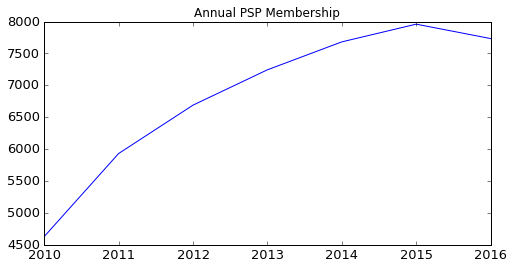

In [110]:
# overall membership changes year to year

mem_x_year_list = ['mem_2010','mem_2011','mem_2012','mem_2013','mem_2014','mem_2015','mem_2016']

dfmxc = pd.DataFrame(dfmy[mem_by_year_list])
dfmxc.columns = ['2010', '2011', '2012', '2013', '2014', '2015', '2016']
memcount =[]
memcount = pd.Series(dfmxc.sum(axis=0))
print memcount

memcount.plot(kind='line', figsize=(8,4), title="Annual PSP Membership", fontsize=13)